In [ ]:
# # Loading image data for CNN
# batch_size = 4    # Number of images being processed before each model update

# # Selecting and downloading the CIFAR10 dataset for training
# trainset = torchvision.datasets.CIFAR10(root='./data', train = True, download = True, transform = transform)
# # Loading in training images. Batch size = number of images being processed each time model updates. 
# trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size, shuffle = True, num_workers = 2)

# # Loading in testing images. 
# testset = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform =transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
#                                          shuffle=False, num_workers=2)
# # Possible classifications:
# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


**Preparing dataset**

In [26]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset
from skimage import io

In [13]:
import os  
# path = "C:/Users/Haotian/Desktop/pythumbs"
path = "/Users/haotianhuang/Desktop/pythumbs"

os.chdir(path)

In [17]:
for i in range(0, 3000):
    os.rename('img' + str(i) + '.png','thumbsdown' + str(i) + '.png') 

In [47]:
import csv

with open('thumbsdata.csv', 'w',newline='') as f:
    thewriter = csv.writer(f)
    
    thewriter.writerow(['file', 'value'])
    
    for i in range(0, 3000):
        thewriter.writerow(['thumbsup' + str(i) + '.png', '0'])
    
    for i in range(0, 3000):
        thewriter.writerow(['thumbsdown' + str(i) + '.png', '1'])
    

**TRAINING BELOW**

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import Dataset
import os
import pandas as pd
from skimage import io

/Users/haotianhuang/miniforge3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Transforming input data
transform = transforms.Compose([   # Chaining multiple image transformations together
    transforms.ToTensor(),           # Converts images into tensor form. 
#     transforms.Grayscale(num_output_channels=3), # BROKEN important line. we are going to convert it to 3 channel rgb & train our model as such, this means our inference model can run rgb values as well
    transforms.Normalize((0.5),(0.5)) # Sets mean and std to 0.5 for each colour channel. # Maps pixel values to -1,1 by (x-mean)/std || don't know how this works 
])

In [28]:
class ThumbsDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.annotations) #6000
    
    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))
        
        if self.transform:
            image = self.transform(image)
            
        return (image, y_label)   

In [4]:
  # path = "C:/Users/Haotian/Desktop/pythumbs"
path = "/Users/haotianhuang/Desktop/pythumbs"

os.chdir(path)
print(os.getcwd())

/Users/haotianhuang/Desktop/pythumbs


In [29]:
from torch.utils.data import DataLoader

batch_size = 4

dataset = ThumbsDataset(csv_file = 'thumbsdata.csv', root_dir = 'data',
                       transform = transform)

train_set, test_set = torch.utils.data.random_split(dataset, [5000, 1000])
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True)

classes = ('thumbsup', 'thumbsdown')

In [30]:
# print(train_set[0])
print(train_set[0])

(tensor([[[ 0.9608,  0.9686,  0.9843, -0.0667, -0.1451,  0.8196, -0.1216,
           0.8745,  0.0431, -0.5765, -0.3804,  0.2784,  0.4980,  0.3882,
           0.9843,  0.9843,  0.9843,  0.9843,  0.9843,  0.9843,  0.9922,
           0.9216,  0.9843,  0.8667,  0.8118,  0.4275,  0.1137, -0.1137],
         [ 0.6314,  0.9843,  0.9216, -0.0510, -0.0431,  0.9686, -0.1451,
           0.8588,  0.3176, -0.5686, -0.2000, -0.2784,  0.1608,  0.0118,
           0.9451,  0.9843,  0.9843,  0.9843,  0.9843,  0.9843,  0.9294,
           0.9843,  0.9608,  0.8431,  0.7333,  0.3647, -0.3098, -0.1922],
         [-0.0667,  0.3255,  0.0039, -0.0196,  0.0039,  0.7255,  0.8118,
           0.1922, -0.2627,  0.1765, -0.3961,  0.0353, -0.0275, -0.0824,
           0.7412,  0.9216,  0.9765,  0.9843,  0.9843,  0.9843,  0.9686,
           0.9765,  0.8824,  0.7647,  0.7098,  0.3020, -0.4902, -0.2392],
         [-0.0431, -0.0196,  0.0510,  0.0196, -0.0039, -0.2941,  0.9686,
           0.9765, -0.0431, -0.2000, -0.1373, -

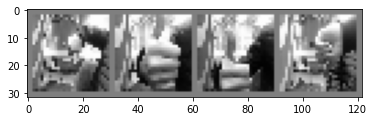

thumbsdown thumbsup thumbsup thumbsdown


In [10]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def imshow(img):
  img = img/2 + 0.5     # Unnormalising image data
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0))) #the order of dimension is channel*width*height but in matplotlib it’s width*height*channel. That’s why the transpose is needed
  plt.show()

# Getting random training images
dataiter = iter(test_loader)      # Iterator of testloader
images, labels = dataiter.next() # Gets 4 which is batch # somehow?? maybe a default setting 
# print(len(images))
# print(len(test_loader))

# Show images
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))   # printing labels

In [11]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    # Adding layers (Convolutional, Pooling, and Fully connected)
    self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = 5)
    self.pool = nn.MaxPool2d(kernel_size = 2, stride = 2)
    self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = 5)
    self.fc1 = nn.Linear(in_features = 16*16, out_features = 120)
    self.fc2 = nn.Linear(in_features = 120, out_features = 84)
    self.fc3 = nn.Linear(84, 2)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = torch.flatten(x,1)   # Flattening all dimensions except batch
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()


In [12]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
for epoch in range(1):
  running_loss = 0.0
  for i, data in enumerate(train_loader, start = 0):
    inputs, labels = data
    # Zero parameter gradients so previous backpropagations do not affect current backpropagation
    optimizer.zero_grad()

    # Forward + backward + optimise
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # Print statistics
    running_loss += loss.item()
    if i % 100 == 99:    # print every 2000 mini-batches
        print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
        running_loss = 0.0

print('Finished Training')

[1,   100] loss: 0.695
[1,   200] loss: 0.686
[1,   300] loss: 0.673
[1,   400] loss: 0.646
[1,   500] loss: 0.527
[1,   600] loss: 0.240
[1,   700] loss: 0.108
[1,   800] loss: 0.069
[1,   900] loss: 0.044
[1,  1000] loss: 0.021
[1,  1100] loss: 0.014
[1,  1200] loss: 0.011
Finished Training


In [98]:
PATH = 'saved_model.pth'
torch.save(net.state_dict(), PATH)

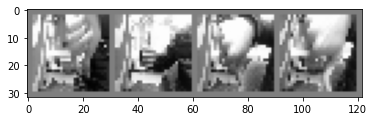

GroundTruth:  thumbsdown thumbsup thumbsdown thumbsdown


In [96]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [99]:
savedNet = Net()
savedNet.load_state_dict(torch.load(PATH))
outputs = savedNet(images)

_,predicted = torch.max(outputs,1)
print(outputs)
print(predicted)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

tensor([[0.0687, 0.0336],
        [0.0601, 0.0506],
        [0.0611, 0.0532],
        [0.0673, 0.0467]], grad_fn=<AddmmBackward0>)
tensor([0, 0, 0, 0])
Predicted:  thumbsup thumbsup thumbsup thumbsup


In [100]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: thumbsup is 80.0 %
Accuracy for class: thumbsdown is 1.2 %


In [14]:
# Input to the model
# x = torch.randn(batch_size, 1, 28, 28, requires_grad=False)
x = torch.randn(1, 1, 28, 28, requires_grad=False)
torch_out = net(x)

# Export the model
torch.onnx.export(net,               # model being run
                  x,                         # model input (or a tuple for multiple inputs)
                  "pythumbs-v1.2.onnx",   # where to save the model (can be a file or file-like object)
                  export_params=True,        # store the trained parameter weights inside the model file
                  opset_version=13,          # the ONNX version to export the model to
                  do_constant_folding=True,  # whether to execute constant folding for optimization
#                   input_names = ['input'],   # the model's input names
#                   output_names = ['thumbsup', 'thumbsdown'], # the model's output names
#                   dynamic_axes={'input' : {0 : 'batch_size'},    # variable length axes
#                                 'output' : {0 : 'batch_size'}}
                 )